# Naïve Bayes Classifier

## Import the necessary libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Read the data

In [3]:
data = pd.read_csv('chirper.csv', encoding = "ISO-8859-1")
data.head(10)

,Target,IDS,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
data['Target'].value_counts()

,count
Target,
1,9500
0,500


## Define the inputs and the target

Identify the **relevant** columns and declare the variables below.

In [5]:
inputs = data['Text']
target = data['Target']

## Split the data into training and tesitng

* Perform a 70:30 split - 30% of the data should be dedicated to testing.
* Set the random state to 365.
* Make sure that there is a fair distribution of the representatives from each class.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target)

## Transform the training and testing inputs using CountVectorizer

In [8]:
vec = CountVectorizer()
x_train_transform = vec.fit_transform(x_train)
x_test_transform = vec.transform(x_test)

## Create a Naïve Bayes model

* Create an instance of the Naïve Bayes class.
* Fit the data to the model.

In [9]:
nbm=MultinomialNB()
nbm.fit(x_train_transform, y_train)

MultinomialNB()

## Make predictions on the test data

In [10]:
y_predict = nbm.predict(x_test_transform)

## Create a confusion matrix

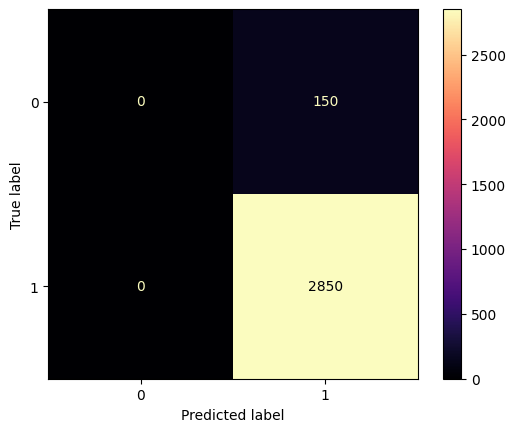

In [11]:
ConfusionMatrixDisplay.from_predictions( y_test, y_predict,
                                        labels = nbm.classes_,
                                        cmap = 'magma')

## Print a classification report

* Fill in the parameters necessary for the classification_report() method.
* A parameter **zero_division** has been also added and set to 0.

In [12]:
print(classification_report(y_test, y_predict,
                            target_names = ['positive','negative'],
                            zero_division = 0))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       150
    negative       0.95      1.00      0.97      2850

    accuracy                           0.95      3000
   macro avg       0.47      0.50      0.49      3000
weighted avg       0.90      0.95      0.93      3000

